In [1]:
import numpy as np
import matplotlib.pyplot as plt

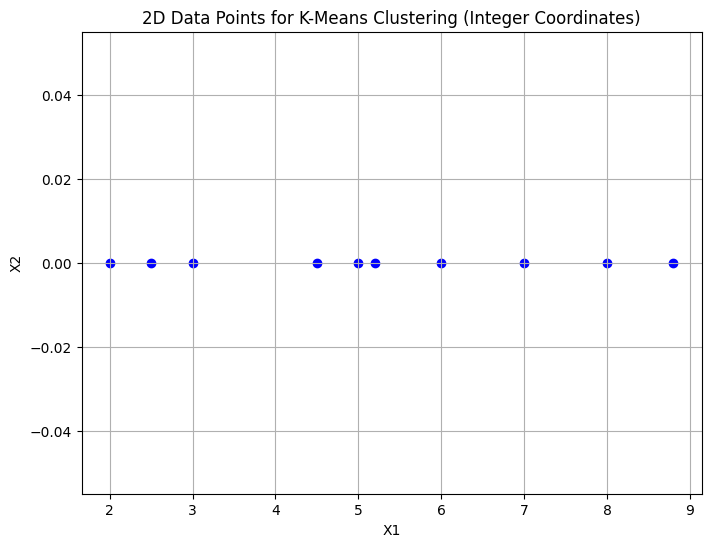

In [2]:
np.random.seed(42)
data_points =  np.array([2, 3, 2.5, 5, 5.2, 6, 4.5, 7, 8, 8.8])

plt.figure(figsize=(8, 6))
plt.scatter(data_points[:], [0]*len(data_points), c='blue', marker='o')
plt.title('2D Data Points for K-Means Clustering (Integer Coordinates)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [3]:
def one_d_plot_result(data_points_cluster, center_points, k):
    # Extract x, y, and cluster labels
    x = data_points_cluster[:, 0]
    clusters = data_points_cluster[:, 1]

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, [0]*len(data_points_cluster), c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(center_points[:], [0]*len(center_points), c=[i for i in range(k)], marker='x', s=200, linewidths=1, label='Cluster Centers')
    # Add labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('1D Data Points Colored by Cluster')
    # Show the plot
    plt.show()



def one_d_k_clustering(data_points, center_points = None, k = None):
    # center_points are the points that clusters will form upon
    if center_points is None and k is not None:
        center_points = data_points[np.random.choice(data_points.shape[0], size=k, replace=False)]
    # for broadcast compatibility we reshape center points and data points
    center_points_reshaped = center_points[:, np.newaxis]
    data_points_reshaped = data_points[np.newaxis, :]
    # it's an np array that will be like this (n, k)
    euclidian_distance = np.abs(center_points_reshaped - data_points_reshaped)
    # from euclidian distance we take the indice of the column with the minimum value for each row
    min_indices = np.argmin(euclidian_distance, axis=0)
    min_indices_matrix = min_indices.reshape(-1, 1)
    # we concatenante the cluster labels with the datapoints
    data_points_cluster = np.concatenate((data_points.reshape(-1, 1), min_indices_matrix), axis=1)
    one_d_plot_result(data_points_cluster, center_points, k)
    # Return the data_points concatenated with the labels
    return data_points_cluster

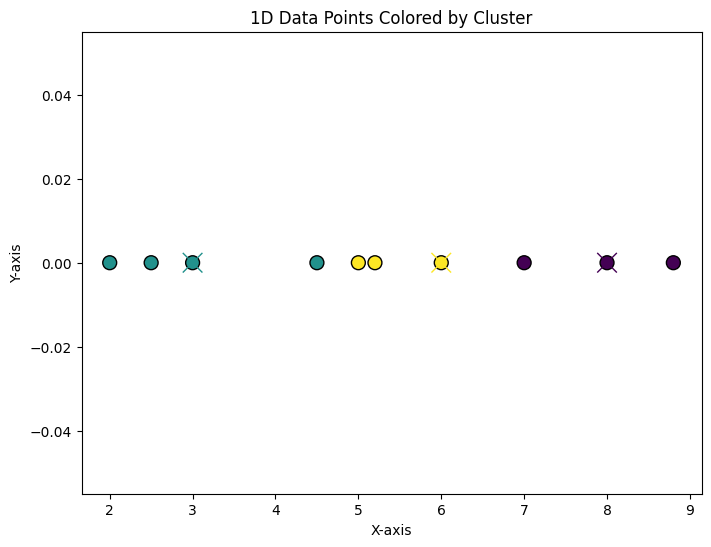

array([[2. , 1. ],
       [3. , 1. ],
       [2.5, 1. ],
       [5. , 2. ],
       [5.2, 2. ],
       [6. , 2. ],
       [4.5, 1. ],
       [7. , 0. ],
       [8. , 0. ],
       [8.8, 0. ]])

In [4]:
one_d_k_clustering(data_points, None, k=3)

In [5]:
def one_d_k_means_clustering(data_points, k):
    def mean_center_points(data_points, labeled_data_points, k):
        labels = labeled_data_points[:,1].astype(int)
        center_points_sum = np.zeros((k))
        counts = np.bincount(labels, minlength=k)
        np.add.at(center_points_sum, labels, data_points[:])
        mean_center_points = center_points_sum / counts[:]
        return mean_center_points

    if k > data_points.shape[0]:
        raise Exception(f"Can't choose a k superior to the amounts of points ({k} > {data_points.shape[0]})")
    prev_center_points = np.zeros((k,2))
    center_points = data_points[np.random.choice(data_points.shape[0], size=k, replace=False)]
    while(not np.array_equal(prev_center_points, center_points)):
        labeled_data_points = one_d_k_clustering(data_points, center_points, k)
        prev_center_points = center_points
        center_points = mean_center_points(data_points,labeled_data_points, k) # returns a (k, 2)

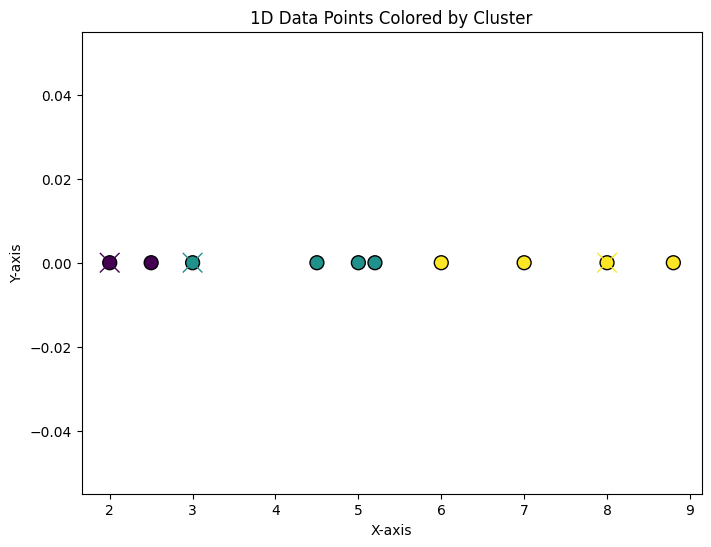

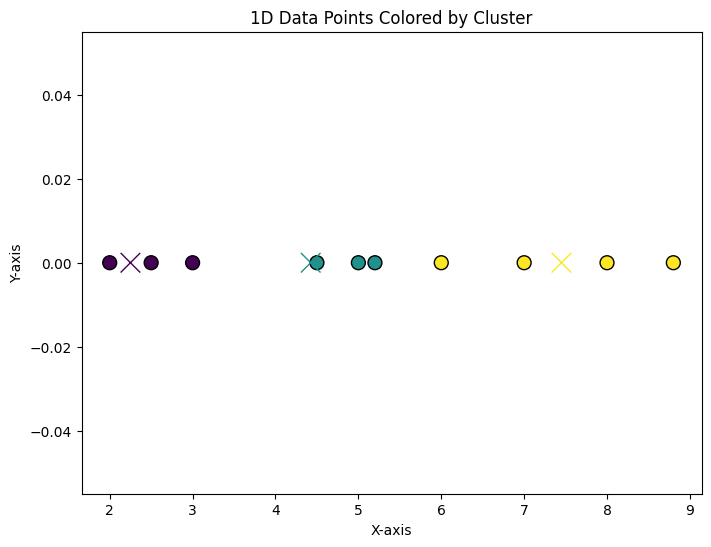

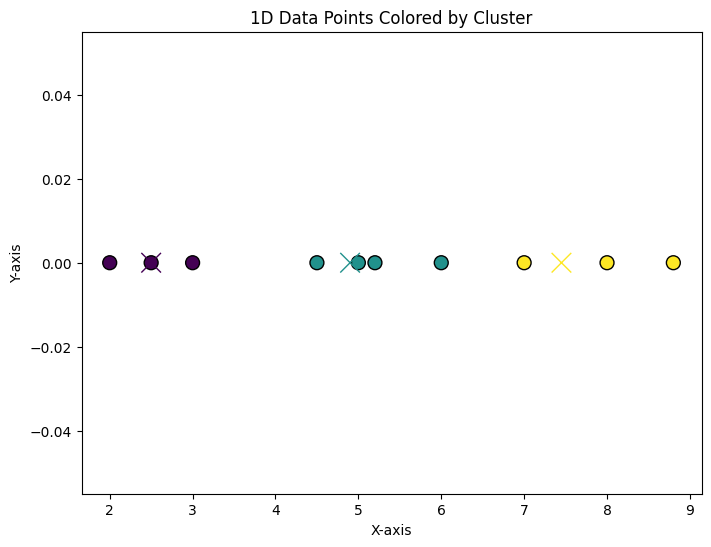

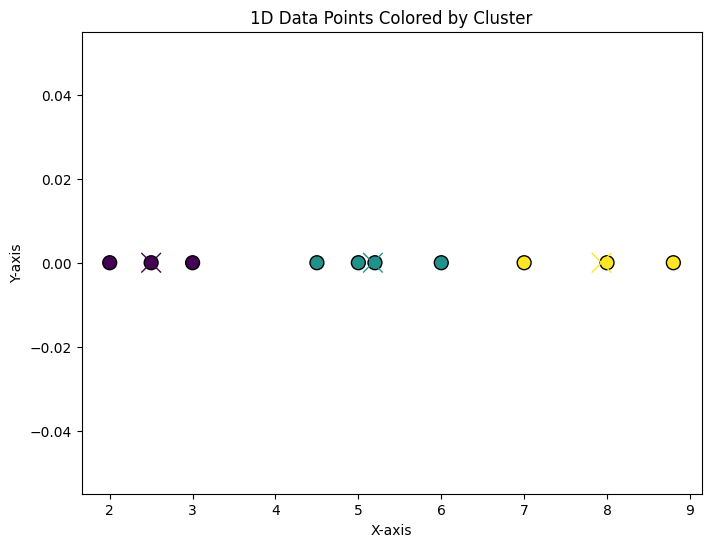

In [6]:
one_d_k_means_clustering(data_points, 3)